In [107]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [108]:
df = pd.read_excel('Flight Ticket Price Prediction Train.xlsx')
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [109]:
df.shape

(10683, 11)

In [110]:
df.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [111]:
for i in df.columns: 
    print('Total number of unique values in ', i, ' = ', df[i].nunique())

Total number of unique values in  Airline  =  12
Total number of unique values in  Date_of_Journey  =  44
Total number of unique values in  Source  =  5
Total number of unique values in  Destination  =  6
Total number of unique values in  Route  =  128
Total number of unique values in  Dep_Time  =  222
Total number of unique values in  Arrival_Time  =  1343
Total number of unique values in  Duration  =  368
Total number of unique values in  Total_Stops  =  5
Total number of unique values in  Additional_Info  =  10
Total number of unique values in  Price  =  1870


    We can see that all the values in the dataset are categorical. 

In [112]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

    Since we only have 1 NaN values in the dataset with over 10k values, we can remove that one. 

### Removing NaN values

In [113]:
df.dropna(axis = 0, inplace = True)

### Dealing with the date

In [114]:
df['year'] = pd.DatetimeIndex(df['Date_of_Journey']).year
df['month'] = pd.DatetimeIndex(df['Date_of_Journey']).month
df['Day'] = pd.DatetimeIndex(df['Date_of_Journey']).day

In [115]:
#Removing the date column
df=df.drop(columns='Date_of_Journey')

### Dealing with the stops

    We can see that the stops column has 'stops' mentioned in almmost every columns which can be removed. 
    
    Non-stop values can be kept as-is.

In [116]:
df['Total_Stops'] = df['Total_Stops'].str.split().str[0]

In [117]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,year,month,Day
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,2019,3,24
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2,No info,7662,2019,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2,No info,13882,2019,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1,No info,6218,2019,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1,No info,13302,2019,1,3


In [118]:
#To find the count of each unique variables in all the columns in a df
for i in range(len(df.columns)):
    print("----- {}-----".format(df.columns[i]))
    print(df[df.columns[i]].value_counts())
    print('\n')
    

----- Airline-----
Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64


----- Source-----
Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64


----- Destination-----
Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64


----- Route-----
DEL → BOM → COK                2376
BLR → DEL                      1552
CCU → BOM → BLR                 979
CCU → BLR                

Observation: 
    
    The highest number of flights in the list are from Jet Airways. 
    
    The highest number of flight are to or from Delhi. 
    
    The highest number of flight headed to is to Cochin. 
    
    DEL - BOM - COK seems to be the best chosen route. 
    
    The highest number of flights have a duration of 2 hr 50 mins. 
    
    Since the highest number of columns in 'Additional Data' shows no data, we info remove that column. 

In [119]:
df=df.drop(columns='Additional_Info')

#Replacing Non-Stop in the dataset

In [120]:
df['Total_Stops'] = df['Total_Stops'].replace(['non-stop'],0)

In [121]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,year,month,Day
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,0,3897,2019,3,24
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2,7662,2019,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2,13882,2019,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1,6218,2019,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1,13302,2019,1,3


### Dealing with time columns

In [122]:
df["Departure hour"]= pd.to_datetime(df.Dep_Time).dt.hour
df["Departure minute"]= pd.to_datetime(df.Dep_Time).dt.minute
df["Arrival hour"]= pd.to_datetime(df.Arrival_Time).dt.hour
df["Arrival minute"]= pd.to_datetime(df.Arrival_Time).dt.minute
df=df.drop(columns="Dep_Time")
df=df.drop(columns="Arrival_Time")

In [123]:
df['year'].value_counts()

2019    10682
Name: year, dtype: int64

In [124]:
#Now the year column is redundant as the only value in it is 2019. Hence we can remove that column. 
df=df.drop(columns='year')

In [125]:
#Creating a list called Duration. 

In [126]:
duration = list(df['Duration'])

In [127]:
duration

['2h 50m',
 '7h 25m',
 '19h',
 '5h 25m',
 '4h 45m',
 '2h 25m',
 '15h 30m',
 '21h 5m',
 '25h 30m',
 '7h 50m',
 '13h 15m',
 '2h 35m',
 '2h 15m',
 '12h 10m',
 '2h 35m',
 '26h 35m',
 '4h 30m',
 '22h 35m',
 '23h',
 '20h 35m',
 '5h 10m',
 '15h 20m',
 '2h 50m',
 '2h 55m',
 '13h 20m',
 '15h 10m',
 '5h 45m',
 '5h 55m',
 '2h 50m',
 '2h 15m',
 '2h 15m',
 '13h 25m',
 '2h 50m',
 '22h',
 '5h 30m',
 '10h 25m',
 '5h 15m',
 '2h 30m',
 '6h 15m',
 '11h 55m',
 '11h 5m',
 '8h 30m',
 '22h 5m',
 '2h 45m',
 '12h',
 '2h 50m',
 '2h 50m',
 '2h 15m',
 '16h 5m',
 '19h 55m',
 '3h 15m',
 '25h 20m',
 '2h 50m',
 '3h',
 '2h 50m',
 '16h 15m',
 '15h 5m',
 '2h 15m',
 '6h 30m',
 '25h 5m',
 '12h 25m',
 '27h 20m',
 '10h 15m',
 '10h 30m',
 '2h 15m',
 '10h 25m',
 '2h 50m',
 '1h 30m',
 '13h 20m',
 '2h 15m',
 '1h 25m',
 '26h 30m',
 '7h 20m',
 '13h 30m',
 '5h',
 '2h 45m',
 '2h 50m',
 '1h 30m',
 '19h 5m',
 '2h 15m',
 '14h 50m',
 '2h 40m',
 '22h 10m',
 '9h 35m',
 '10h',
 '21h 20m',
 '5h 25m',
 '18h 45m',
 '12h 20m',
 '18h',
 '9h 15

In [128]:
#Here, we will be separating the minute and hours in to two different columns. 

In [129]:
for i in range(len(duration)):
    if len(duration[i].split()) != 2:
        if 'm' in duration[i]:
            duration[i] = '0h' + duration[i]
        else:
            duration[i] = duration[i] + '0m'
            
    
duration_hours = []
duration_minutes = []

for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = 'h')[0]))
    duration_minutes.append(int(duration[i].split(sep = 'h')[1].split('m')[0]))
    
df['duration_hour'] = duration_hours
df['duration_minute'] = duration_minutes

    As we have number of stops available in the data, so there is no relevance for the route as the number of stops will get updated automatically.

    We will remove the column route from the data as well ass duration as we have the split data for the same.

In [130]:
df=df.drop(columns=['Route','Duration'])

In [131]:
df.head()

,Airline,Source,Destination,Total_Stops,Price,month,Day,Departure hour,Departure minute,Arrival hour,Arrival minute,duration_hour,duration_minute
0,IndiGo,Banglore,New Delhi,0,3897,3,24,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45


### Visualization

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64


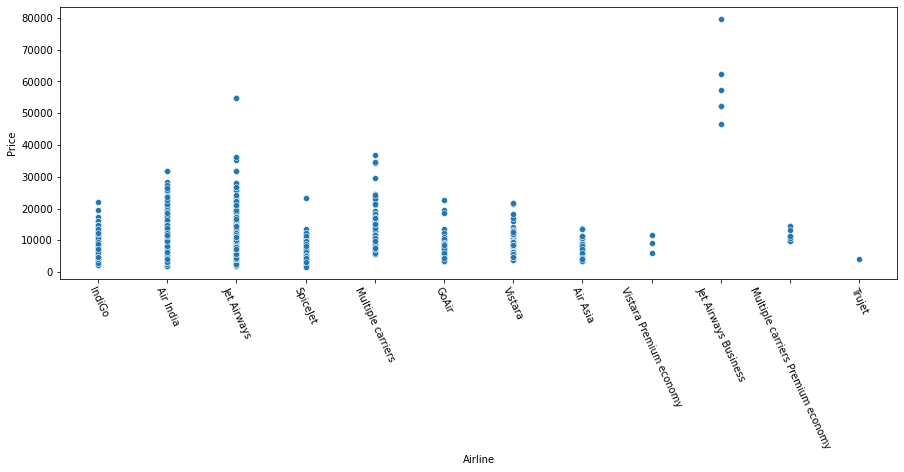

In [132]:
plt.figure(figsize=(15,5))
sb.scatterplot(x='Airline',y='Price',data=df)
plt.xticks(rotation = -65, fontsize = 10)
print(df['Airline'].value_counts())
plt.show()

    We can see that Indigo, Air Asia, and Trujet has the cheapest flights. 
    
    Jet Airways Business cost the highest. 
    
    Other Airways are mostly economy. 

6     2535
3     2211
5     2074
9     1406
1     1075
12     957
4      424
Name: month, dtype: int64


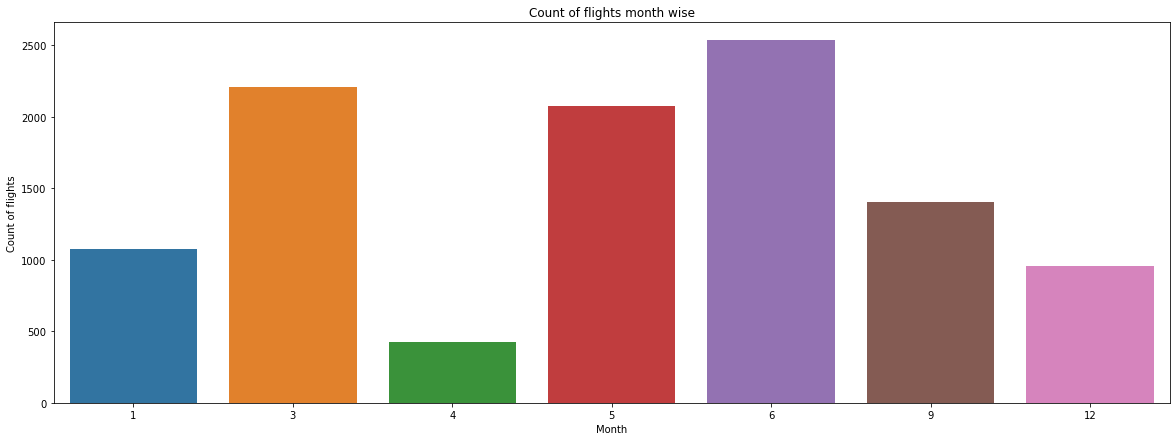

In [133]:
plt.figure(figsize = (20 , 7))
plt.title('Count of flights month wise')
sb.countplot(x = 'month', data = df)
plt.xlabel('Month')
plt.ylabel('Count of flights')
print(df['month'].value_counts())

    We can see that the highest number of flights are in February, May, and June. 

<AxesSubplot:xlabel='Departure hour', ylabel='count'>

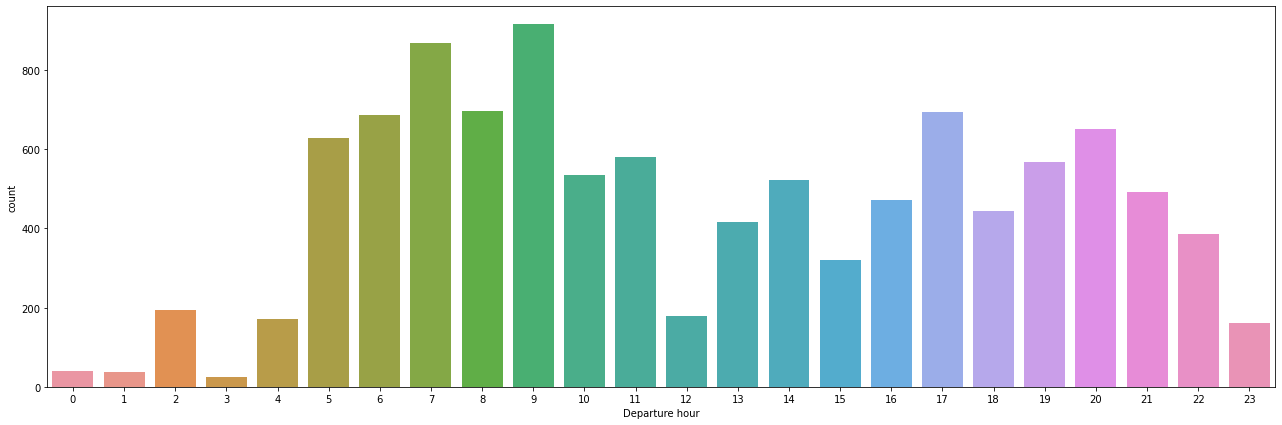

In [134]:
plt.figure(figsize = (22, 7))
sb.countplot(x = 'Departure hour', data = df)

    We can see that the highest number of flight departures are at 7 & 9 AM. Post-noon, the busiest time is between 5 & 8 PM.
    
    The number of flights decrease between 11 PM and 1 AM. 
    
    

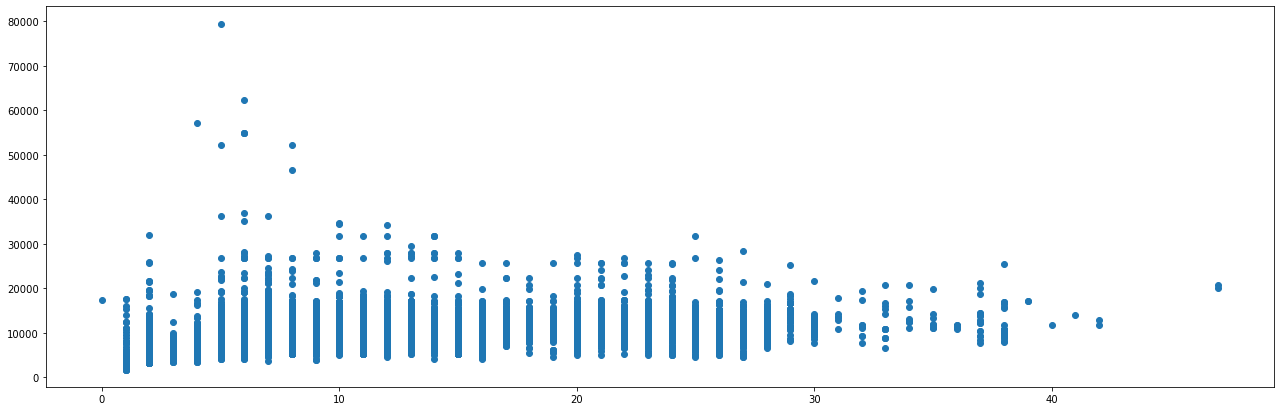

In [135]:
plt.figure(figsize = (22, 7))
plt.scatter(df['duration_hour'], df['Price'])

    We can see that the price of the ticket is not related to the duration of the journey. 

<AxesSubplot:xlabel='Source', ylabel='count'>

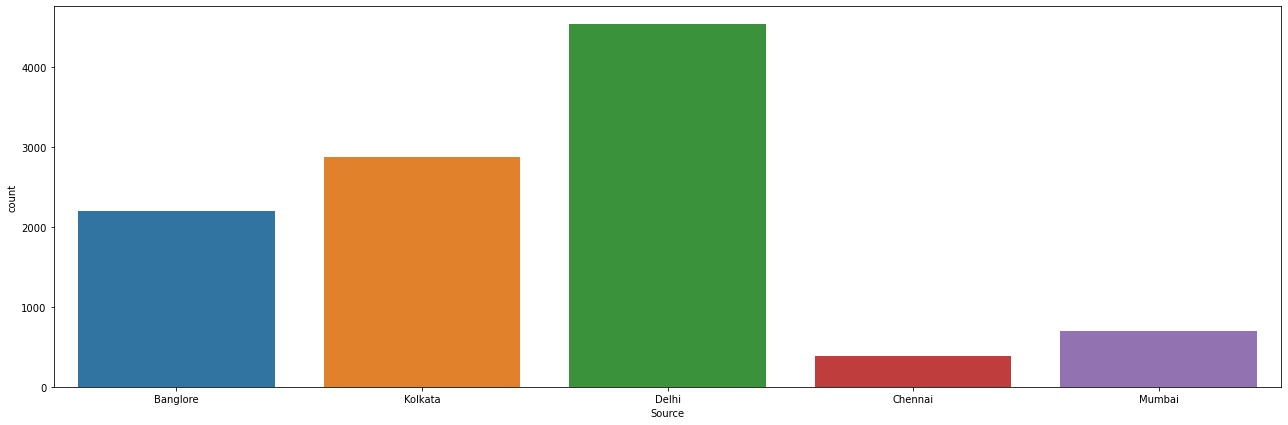

In [136]:
plt.figure(figsize = (22, 7))
sb.countplot(x = 'Source', data = df)

    We can see that the most of the flights start from Delhi, seconded by Kolkata and Bangalore. 

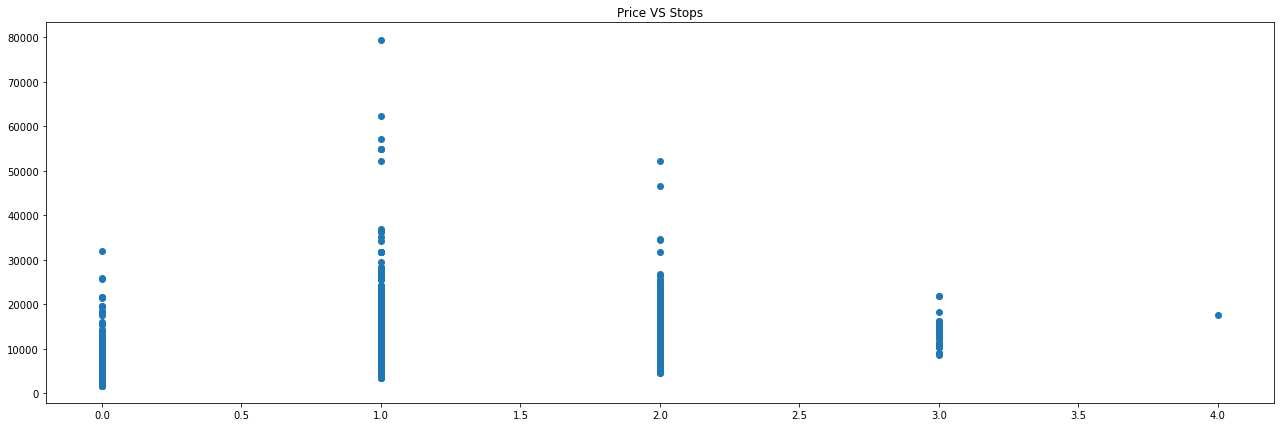

In [137]:
plt.figure(figsize = (22, 7))
plt.title('Price VS Stops')
plt.scatter(df['Total_Stops'], df['Price'])

    We can see that the number of stops and Price are not correlated. 

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64


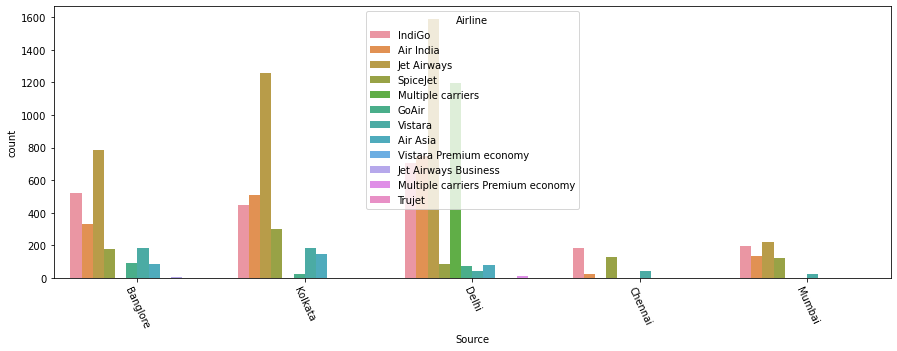

In [138]:
plt.figure(figsize=(15,5))
sb.countplot(x='Source', hue = 'Airline', data=df)
plt.xticks(rotation = -65, fontsize = 10)
print(df['Airline'].value_counts())
plt.show()

    This plot shows the number of flights from each source locations. 
    
    We can see that Trujet is only available from Delhi. 
    
    Jet Airwarys Business is also only available Bangalore. 

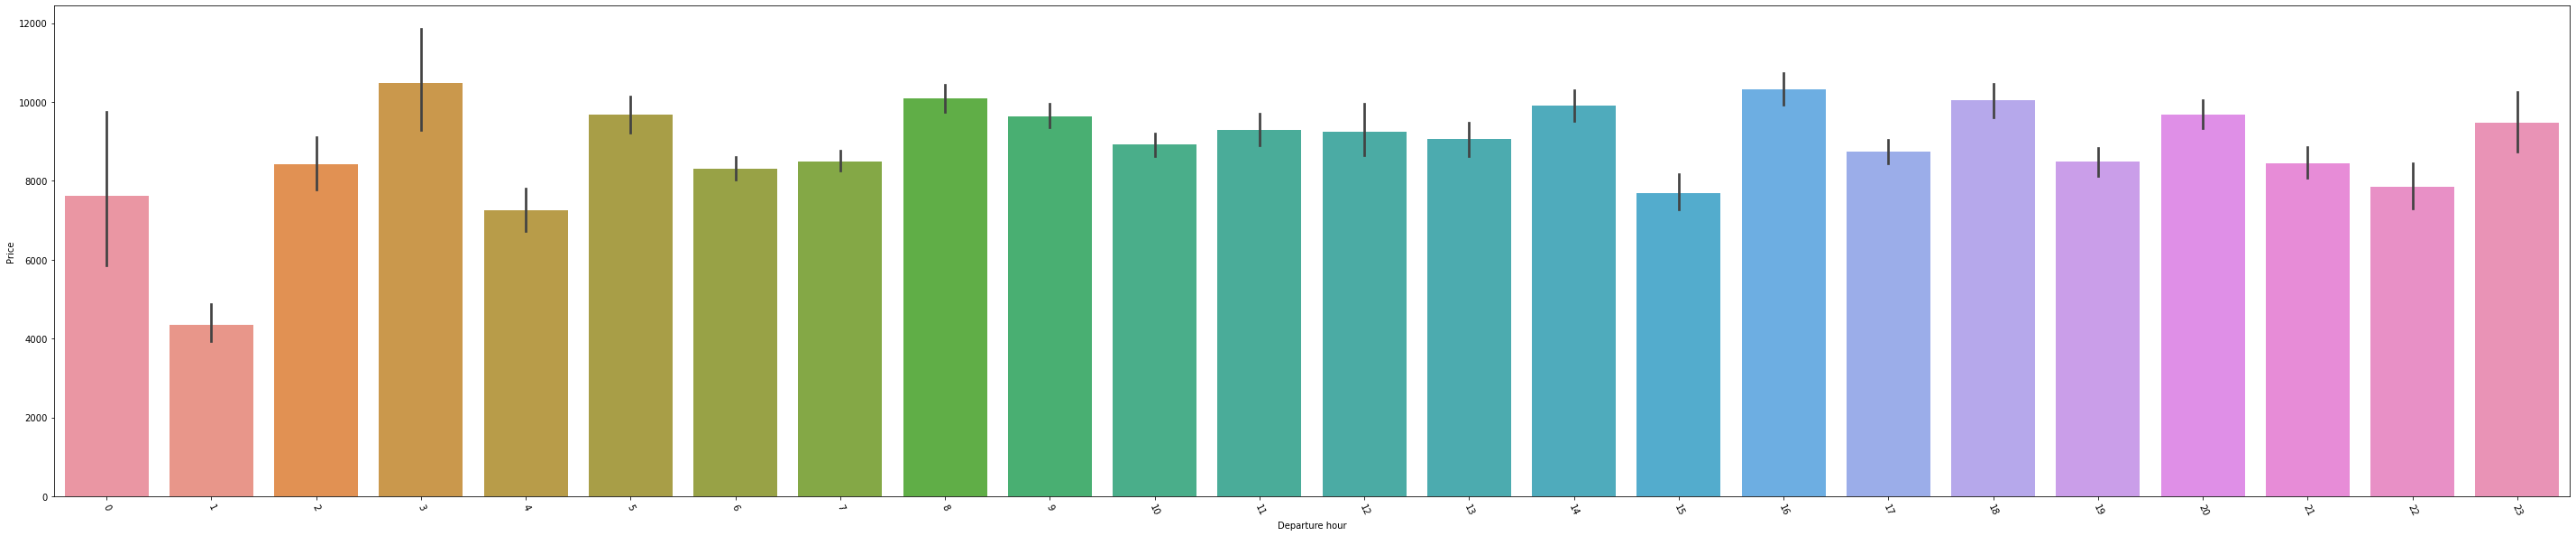

In [139]:
plt.figure(figsize = (50,10))
sb.barplot(x = 'Departure hour', y ='Price', data = df)
plt.xticks(rotation = -65, fontsize = 10)
plt.show()

    We can see that the flights early morning costs less compared to peak times. 

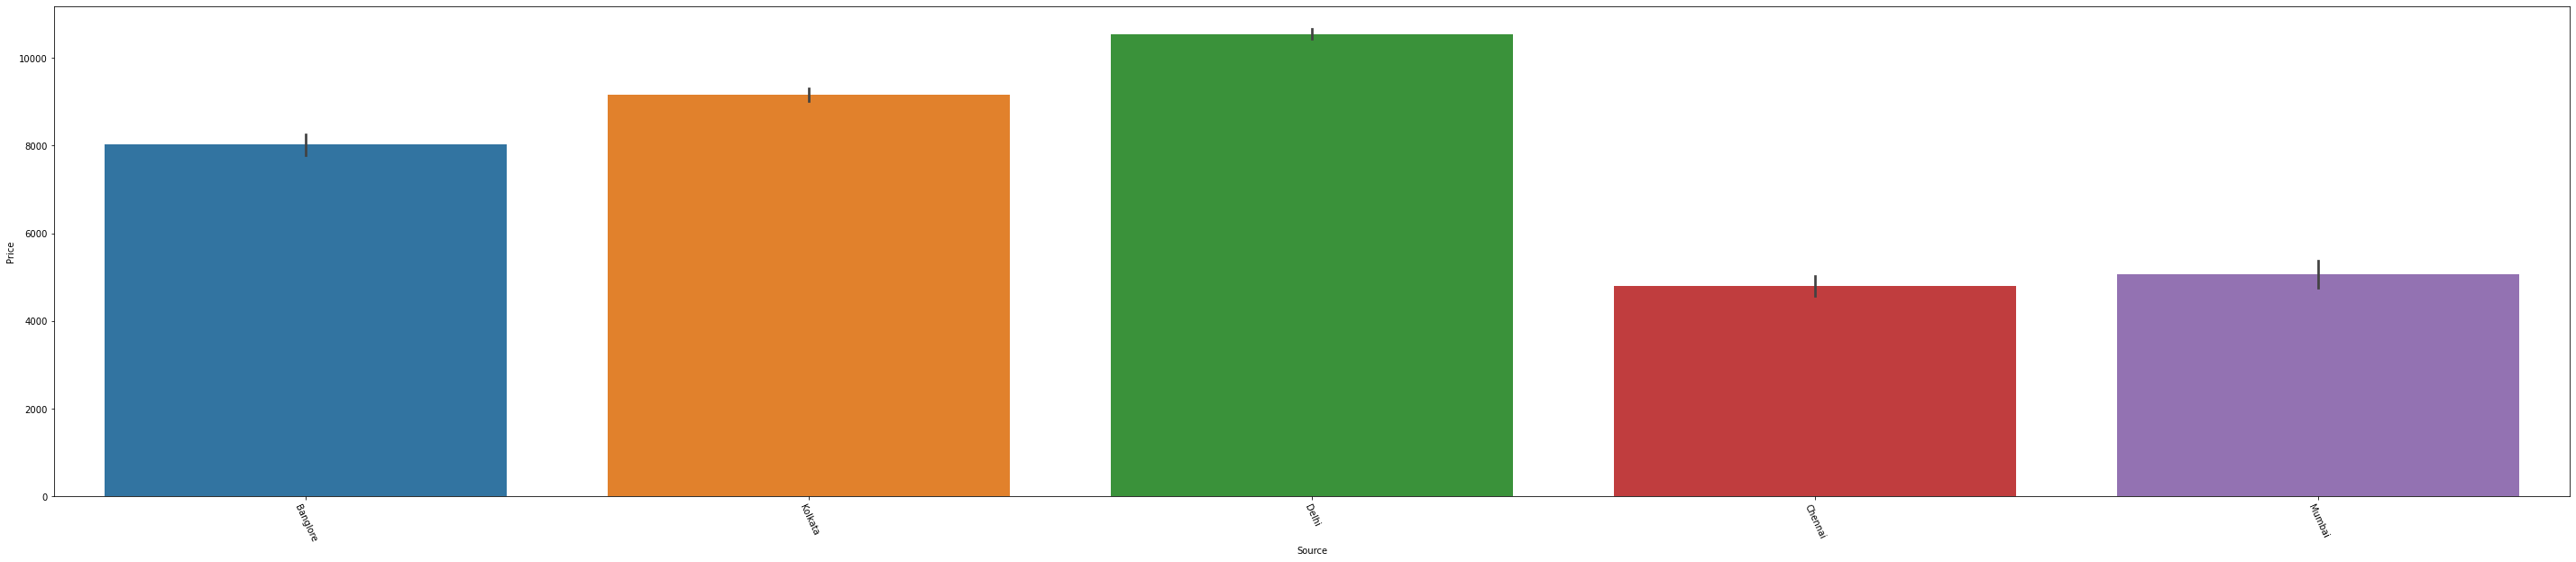

In [140]:
plt.figure(figsize = (50,10))
sb.barplot(x = 'Source', y ='Price', data = df)
plt.xticks(rotation = -65, fontsize = 10)
plt.show()

    We can see that the prices for flights from Delhi is the highest, seconded by Kolkata and Bangalore. 

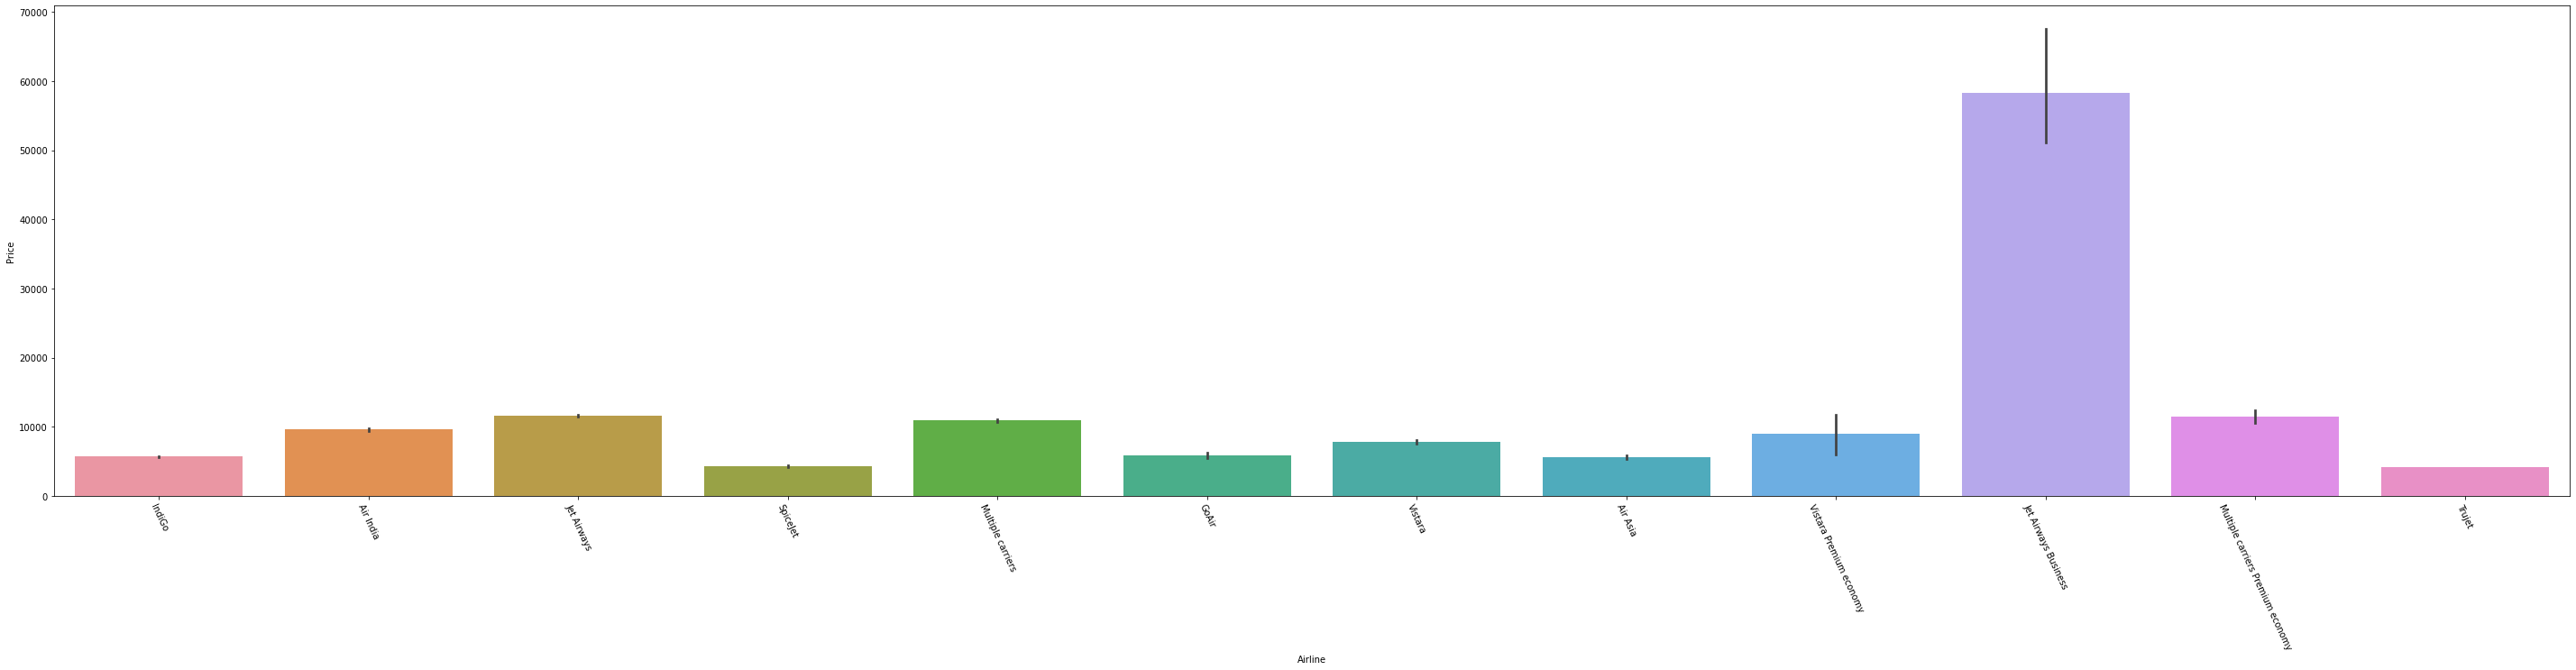

In [141]:
plt.figure(figsize = (50,10))
sb.barplot(x = 'Airline', y ='Price', data = df)
plt.xticks(rotation = -65, fontsize = 10)
plt.show()

    We can see that Jet Airwarys Business costs the highest, seconded by Multiple carriers permium economy and multiple carriers, jet airways etc. 

### Summary

In [142]:
df.describe()

,Price,month,Day,Departure hour,Departure minute,Arrival hour,Arrival minute,duration_hour,duration_minute
count,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000
mean,9087.214567,5.534731,12.682925,12.491013,24.409287,13.349186,24.690601,10.244898,28.326624
std,4611.548810,2.987626,8.803800,5.748820,18.767801,6.859317,16.506808,8.494916,16.945817
min,1759.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5277.000000,3.000000,5.000000,8.000000,5.000000,8.000000,10.000000,2.000000,15.000000
50%,8372.000000,5.000000,6.000000,11.000000,25.000000,14.000000,25.000000,8.000000,30.000000
75%,12373.000000,6.000000,21.000000,18.000000,40.000000,19.000000,35.000000,15.000000,45.000000
max,79512.000000,12.000000,27.000000,23.000000,55.000000,23.000000,55.000000,47.000000,55.000000


<AxesSubplot:>

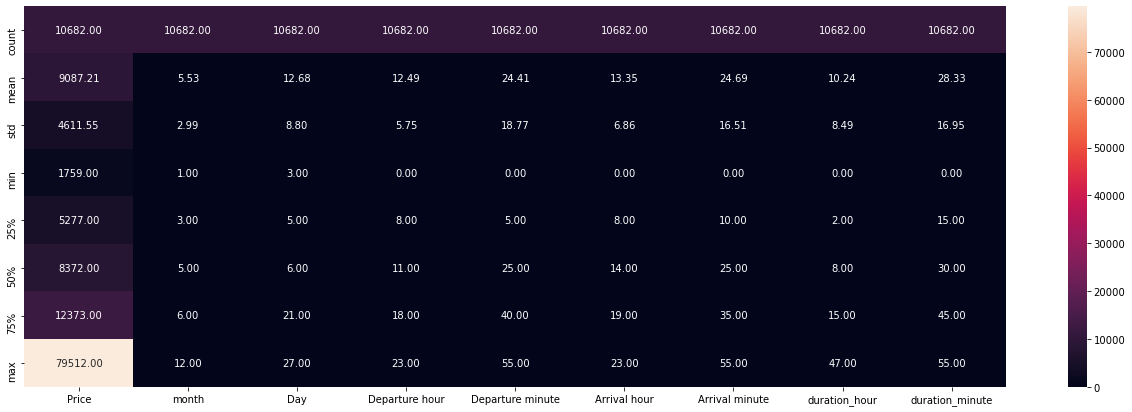

In [143]:
plt.figure(figsize = (22,7))
sb.heatmap(df.describe(), annot = True, fmt = '0.2f')

    We can see that the only column with high difference in mean and max values are for price. 
    
    This column will be scaled later. 

### Correlation

In [144]:
df.corr()

,Price,month,Day,Departure hour,Departure minute,Arrival hour,Arrival minute,duration_hour,duration_minute
Price,1.000000,0.010705,-0.165448,0.006799,-0.024458,0.024244,-0.086155,0.508778,-0.124855
month,0.010705,1.000000,-0.264896,0.028189,0.002136,-0.004329,-0.025786,0.055552,-0.018597
Day,-0.165448,-0.264896,1.000000,-0.002301,-0.016433,-0.002176,-0.021423,-0.037964,-0.007708
Departure hour,0.006799,0.028189,-0.002301,1.000000,-0.024745,0.005180,0.067911,0.002869,-0.023707
Departure minute,-0.024458,0.002136,-0.016433,-0.024745,1.000000,0.043122,-0.017597,-0.022104,0.092485
Arrival hour,0.024244,-0.004329,-0.002176,0.005180,0.043122,1.000000,-0.154363,0.055276,-0.118309
Arrival minute,-0.086155,-0.025786,-0.021423,0.067911,-0.017597,-0.154363,1.000000,-0.074450,0.151628
duration_hour,0.508778,0.055552,-0.037964,0.002869,-0.022104,0.055276,-0.074450,1.000000,-0.126468
duration_minute,-0.124855,-0.018597,-0.007708,-0.023707,0.092485,-0.118309,0.151628,-0.126468,1.000000


<AxesSubplot:>

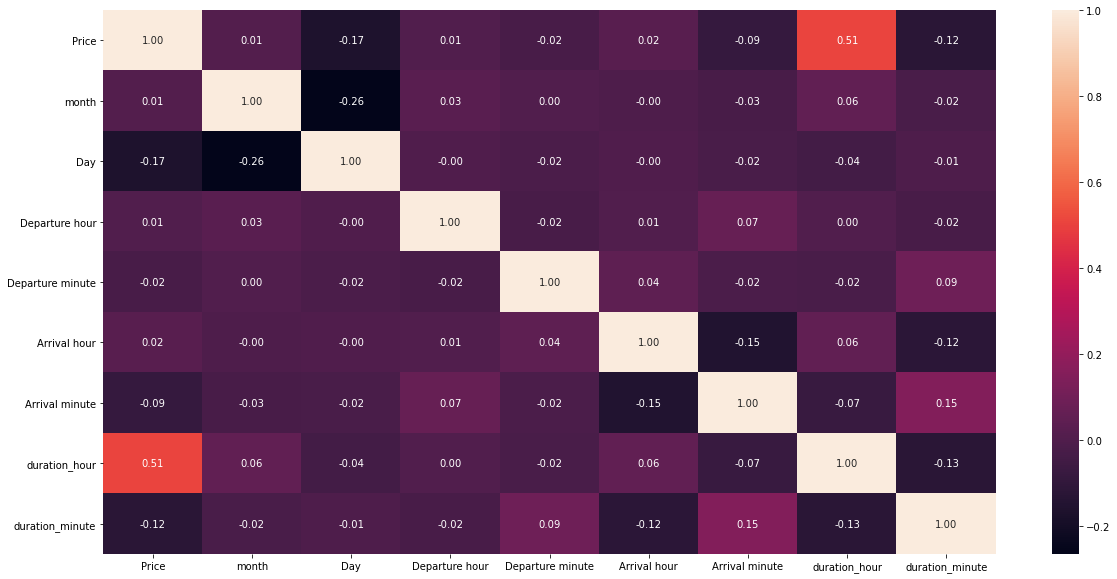

In [145]:
plt.figure(figsize = (20,10))
sb.heatmap(df.corr(), annot = True, fmt = '0.2f')

Observation: 
    
    We can see that Duration_hour and Price has positive correlation. 
    
    

### Encoding

In [146]:
from sklearn.preprocessing import OrdinalEncoder

In [147]:
oe = OrdinalEncoder()

In [148]:
#Before Encoding, let's check the dtypes. 
df.dtypes

Airline             object
Source              object
Destination         object
Total_Stops         object
Price                int64
month                int64
Day                  int64
Departure hour       int64
Departure minute     int64
Arrival hour         int64
Arrival minute       int64
duration_hour        int64
duration_minute      int64
dtype: object

    We'll have to change total_stops to int

In [149]:
df['Total_Stops']=df['Total_Stops'].astype(int)

In [150]:
df.dtypes

Airline             object
Source              object
Destination         object
Total_Stops          int32
Price                int64
month                int64
Day                  int64
Departure hour       int64
Departure minute     int64
Arrival hour         int64
Arrival minute       int64
duration_hour        int64
duration_minute      int64
dtype: object

In [151]:
for i in df.columns:
    if df[i].dtypes == 'object':
        df[i] = oe.fit_transform(df[i].values.reshape(-1,1))

In [152]:
df.dtypes

Airline             float64
Source              float64
Destination         float64
Total_Stops           int32
Price                 int64
month                 int64
Day                   int64
Departure hour        int64
Departure minute      int64
Arrival hour          int64
Arrival minute        int64
duration_hour         int64
duration_minute       int64
dtype: object

### Splitting X & Y

In [153]:
x = df.drop(['Price'], axis = 1)
y = df['Price']

    Since Prices are the output variable, and since all the other columns have either categorical or limited values, we do not have to check the outliers or scale this dataset. 

In [154]:
x.shape

(10682, 12)

In [155]:
y.shape

(10682,)

### Importing the models

In [156]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [157]:
#Creating instances for each model
lr = LinearRegression()
knr = KNeighborsRegressor()
dtr = DecisionTreeRegressor()
rfr = RandomForestRegressor()
svr = SVR()
ls = Lasso()
rd = Ridge()
eln = ElasticNet()

In [158]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 77)

In [159]:
x_train.shape

(7477, 12)

In [160]:
x_test.shape

(3205, 12)

In [161]:
y_train.shape

(7477,)

In [162]:
y_test.shape

(3205,)

In [163]:
model = [lr, knr, dtr, svr, rfr, ls, rd, eln]
for m in model:
    print(m)
    m.fit(x_train, y_train)
    a = m.score(x_train, y_train)
    pred_test = m.predict(x_test)
    pred_train = m.predict(x_train)
    print('Score: ', a)
    print('Mean absolute error: ', mean_absolute_error(y_test,pred_test))
    print('Mean squared error: ', mean_squared_error(y_test,pred_test))
    print('Root mean squared error: ', np.sqrt(mean_squared_error(y_test,pred_test)))
    print('R2 Score: ', r2_score(y_test,pred_test))
    print('\n\n')

LinearRegression()
Score:  0.415848768566468
Mean absolute error:  2437.083132678716
Mean squared error:  10946069.122228678
Root mean squared error:  3308.4844146872865
R2 Score:  0.4563115514865398



KNeighborsRegressor()
Score:  0.7387057191314061
Mean absolute error:  1875.9155070202808
Mean squared error:  9019061.02055538
Root mean squared error:  3003.175156489441
R2 Score:  0.5520255501259259



DecisionTreeRegressor()
Score:  0.9737711973371953
Mean absolute error:  1326.422620904836
Mean squared error:  5435949.975884036
Root mean squared error:  2331.5123795262243
R2 Score:  0.7299977575892171



SVR()
Score:  0.0026160548988583
Mean absolute error:  3544.3612857357143
Mean squared error:  20174233.557702124
Root mean squared error:  4491.573617085901
R2 Score:  -0.0020490114264881676



RandomForestRegressor()
Score:  0.9509808049837254
Mean absolute error:  1186.5755194384224
Mean squared error:  3575338.4591686777
Root mean squared error:  1890.8565411391414
R2 Score:  0

### Cross Validation

In [164]:
from sklearn.model_selection import cross_val_score

In [165]:
model = [lr, knr, dtr, svr, rfr, ls, rd, eln]
for m in model: 
    print (m)
    i=[]
    for j in range (2,10):
        score = cross_val_score(m, x, y, cv = j)
        cv_mean = score.mean()
        i.append(cv_mean)
        a = i.index(max(i))+2
        b = max(i)
    print(f'At cross fold {a} the cv score is {b}')
    print('\n')

LinearRegression()
At cross fold 9 the cv score is 0.42918168872664614


KNeighborsRegressor()
At cross fold 9 the cv score is 0.6151631637752101


DecisionTreeRegressor()
At cross fold 5 the cv score is 0.6788628152991214


SVR()
At cross fold 9 the cv score is 0.0100619006502328


RandomForestRegressor()
At cross fold 5 the cv score is 0.7878621413417115


Lasso()
At cross fold 9 the cv score is 0.4291840553014699


Ridge()
At cross fold 9 the cv score is 0.4291821801471178


ElasticNet()
At cross fold 9 the cv score is 0.3602945320760261




    I'll take Random Forest Regressor as my best model as the difference between R2 and CV is low, as well as the high value. 

### Redoing the best model 

In [166]:
rfr.fit(x_train, y_train)
a = rfr.score(x_train, y_train)
pred_test_rfr = rfr.predict(x_test)
pred_train_rfr = rfr.predict(x_train)
print('Score: ', a)
print('Mean absolute error: ', mean_absolute_error(y_test,pred_test_rfr))
print('Mean squared error: ', mean_squared_error(y_test,pred_test_rfr))
print('Root mean squared error: ', np.sqrt(mean_squared_error(y_test,pred_test_rfr)))
print('R2 Score: ', r2_score(y_test,pred_test_rfr))

Score:  0.9510544038782607
Mean absolute error:  1190.4883435529716
Mean squared error:  3602445.4392909496
Root mean squared error:  1898.0109165362958
R2 Score:  0.8210674581101398


    We're getting 82% accuracy for this model. 

### GridSearch CV

In [167]:
from sklearn.model_selection import GridSearchCV

In [168]:
parameters = {'criterion':['mse','mae'],'max_features':['log2','auto','sqrt'], 'n_estimators' : [10,20,30],'min_samples_split' : [2,4,8]}
rfr = RandomForestRegressor()
clf = GridSearchCV(rfr, parameters, cv = 5, n_jobs = -1, verbose = 2)
clf.fit(x_train, y_train)

print(clf.best_params_)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
{'criterion': 'mse', 'max_features': 'sqrt', 'min_samples_split': 8, 'n_estimators': 20}


In [169]:
rfr_final = RandomForestRegressor(criterion = 'mse', max_features = 'sqrt', min_samples_split = 4, n_estimators = 30)
rfr_final.fit(x_train, y_train)
rfr_final.score(x_train, y_train)
pred_rfr_final = rfr_final.predict(x_test)

rfrs = r2_score(y_test, pred_rfr_final)
rfrs

0.8194081590930415

    We're getting a model with 82% accuracy

### Plotting the model fit. 

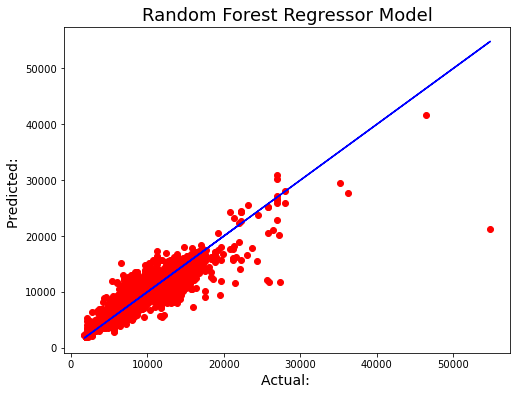

In [170]:
plt.figure(figsize = (8,6))
plt.scatter(x = y_test, y = pred_rfr_final, color = 'r')
plt.plot(y_test, y_test, color = 'b')
plt.xlabel('Actual: ', fontsize = 14)
plt.ylabel('Predicted: ', fontsize = 14)
plt.title('Random Forest Regressor Model', fontsize = 18)
plt.show()

In [171]:
data = [pred_rfr_final, y_test]
pd.DataFrame(data, index = ['Predicted', 'Actual'])

,0,1,2,3,4,5,6,7,8,9,...,3195,3196,3197,3198,3199,3200,3201,3202,3203,3204
Predicted,5695.724444,10905.1475,4305.02246,6841.146111,5402.389444,8992.888333,13800.466667,5180.344444,15673.950952,25472.556667,...,5222.658056,15158.96373,11835.536825,13288.397381,4132.12496,6221.225714,11914.706746,3766.722778,3586.186667,14149.893333
Actual,5601.000000,11200.0000,4226.00000,6628.000000,4651.000000,8025.000000,11087.000000,5277.000000,19644.000000,23170.000000,...,4647.000000,16863.00000,12534.000000,14300.000000,3898.00000,5170.000000,9663.000000,3543.000000,4319.000000,22096.000000


In [172]:
print('Errors:')
print('\n')
print('Mean absolute error: ', mean_absolute_error(y_test,pred_rfr_final))
print('Mean squared error: ', mean_squared_error(y_test,pred_rfr_final))
print('Root mean squared error: ', np.sqrt(mean_squared_error(y_test,pred_rfr_final)))
print('\n')
print('R2 Score: ', r2_score(y_test,pred_rfr_final))

Errors:


Mean absolute error:  1237.2281864874883
Mean squared error:  3635852.0746264346
Root mean squared error:  1906.7910411543355


R2 Score:  0.8194081590930415


### Saving the model 

In [173]:
import joblib
joblib.dump(ls, 'Flight_Price_Prediction.obj')

['Flight_Price_Prediction.obj']

### Preparing the test file

In [174]:
dft = pd.read_excel('Flight Ticket Price Prediction Test.xlsx')
dft.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [175]:
dft['year'] = pd.DatetimeIndex(dft['Date_of_Journey']).year
dft['month'] = pd.DatetimeIndex(dft['Date_of_Journey']).month
dft['Day'] = pd.DatetimeIndex(dft['Date_of_Journey']).day

In [176]:
dft.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,year,month,Day
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,2019,6,6
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info,2019,12,5
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included,2019,5,21
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info,2019,5,21
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info,2019,6,24


In [177]:
dft=dft.drop(columns='Date_of_Journey')

In [178]:
dft['Total_Stops'] = dft['Total_Stops'].str.split().str[0]

In [179]:
dft['Total_Stops'] = dft['Total_Stops'].replace(['non-stop'],0)

In [180]:
dft["Departure hour"]= pd.to_datetime(dft.Dep_Time).dt.hour
dft["Departure minute"]= pd.to_datetime(dft.Dep_Time).dt.minute
dft["Arrival hour"]= pd.to_datetime(dft.Arrival_Time).dt.hour
dft["Arrival minute"]= pd.to_datetime(dft.Arrival_Time).dt.minute
dft=dft.drop(columns="Dep_Time")
dft=dft.drop(columns="Arrival_Time")

In [181]:
dft=dft.drop(columns='year')

In [182]:
duration_test = list(dft['Duration'])

In [183]:
for i in range(len(duration_test)):
    if len(duration_test[i].split()) != 2:
        if 'm' in duration_test[i]:
            duration_test[i] = '0h' + duration_test[i]
        else:
            duration_test[i] = duration_test[i] + '0m'
            
    
duration_hours_test = []
duration_minutes_test = []

for i in range(len(duration_test)):
    duration_hours_test.append(int(duration_test[i].split(sep = 'h')[0]))
    duration_minutes_test.append(int(duration_test[i].split(sep = 'h')[1].split('m')[0]))

In [184]:
dft['duration_hour'] = duration_hours_test
dft['duration_minute'] = duration_minutes_test

In [185]:
dft=dft.drop(columns=['Route','Duration'])

In [186]:
dft=dft.drop(columns='Additional_Info')

In [187]:
dft['Total_Stops']=dft['Total_Stops'].astype(int)

In [188]:
for i in dft.columns:
    if dft[i].dtypes == 'object':
        dft[i] = oe.fit_transform(dft[i].values.reshape(-1,1))

### Re-importing the model

In [189]:
final = joblib.load('Flight_Price_Prediction.obj')

In [190]:
final_test = final.predict(dft)

In [191]:
pd.DataFrame(final_test)

,0
0,10145.881133
1,8437.196880
2,10223.099846
3,9784.003950
4,4311.295754
...,...
2666,10070.885981
2667,3444.870991
2668,10306.520849
2669,10060.640171
